Missing values:
 Age         177
Embarked      2
Cabin       687
dtype: int64

Numerical Statistics:
          Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Object Statistics:
                            Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681  

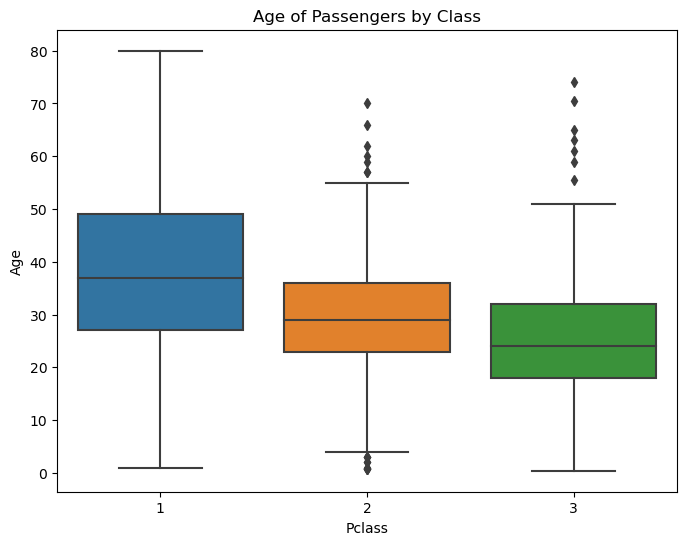


Passengers with more than 2 family members onboard:
                                                           Name  FamilySize
PassengerId                                                               
8                               Palsson, Master. Gosta Leonard           4
14                                 Andersson, Mr. Anders Johan           6
17                                        Rice, Master. Eugene           5
25                               Palsson, Miss. Torborg Danira           4
26           Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...           6
...                                                        ...         ...
851                    Andersson, Master. Sigvard Harald Elias           6
859                      Baclini, Mrs. Solomon (Latifa Qurban)           3
864                          Sage, Miss. Dorothy Edith "Dolly"          10
886                       Rice, Mrs. William (Margaret Norton)           5
889                   Johnston, Miss. Catherin

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


titanic_df = pd.read_csv("C:/Users/maths/Desktop/ojas_230957162/fml/week1/Titanic.csv")


titanic_df.set_index('PassengerId', inplace=True)


missing_values = titanic_df[['Age', 'Embarked', 'Cabin']].isnull().sum()
print("Missing values:\n", missing_values)


numerical_stats = titanic_df.describe()
object_stats = titanic_df.describe(include=['object'])

print("\nNumerical Statistics:\n", numerical_stats)
print("\nObject Statistics:\n", object_stats)


survival_rate = titanic_df['Survived'].mean() * 100
print(f"\nPercentage of passengers who survived: {survival_rate:.2f}%")


gender_survival_rate = titanic_df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival rates by gender:\n", gender_survival_rate)

contingency_table = pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"\nChi-squared test p-value: {p}")
if p < 0.05:
    print("There is a significant relationship between gender and survival.")
else:
    print("There is no significant relationship between gender and survival.")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Age of Passengers by Class')
plt.show()


titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
large_family_passengers = titanic_df[titanic_df['FamilySize'] > 2]
print("\nPassengers with more than 2 family members onboard:\n", large_family_passengers[['Name', 'FamilySize']])


print("\nCorrelation Matrix:\n", correlation_matrix)

categorical_columns = ['Pclass', 'Sex', 'Embarked']
for col in categorical_columns:
    contingency_table = pd.crosstab(titanic_df[col], titanic_df['Survived'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi-squared test for {col}: p-value = {p}")
    if p < 0.05:
        print(f"{col} is significantly related to survival.")
    else:
        print(f"{col} is not significantly related to survival.")


survival_by_gender_class = titanic_df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)
print("\nTotal number of male and female passengers in each class, categorized by survival:\n", survival_by_gender_class)
